In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
pd.set_option('display.max_rows', 1000)

finance_df = pd.read_csv('data/2020/utah/PCC-2020.csv')

finance_df.head()

,FILED,PCC,REPORT,TRAN_ID,TRAN_TYPE,TRAN_DATE,TRAN_AMT,INKIND,LOAN,AMENDS,NAME,PURPOSE,ADDRESS1,ADDRESS2,CITY,STATE,ZIP,INKIND_COMMENTS
0,X,"Abbott, Nelson",Convention,975217,Contribution,3/2/2020,1000.0,NaN,X,NaN,Nelson Abbott,NaN,195 South Palisade,NaN,Orem,UT,84097,NaN
1,X,"Abbott, Nelson",Convention,975321,Contribution,3/5/2020,2000.0,NaN,X,NaN,Nelson Abbott,NaN,195 South Palisade,NaN,Orem,UT,84097,NaN
2,X,"Abbott, Nelson",Convention,975814,Contribution,3/9/2020,2000.0,NaN,X,NaN,Nelson Abbott,NaN,195 South Palisade,NaN,Orem,UT,84097,NaN
3,X,"Abbott, Nelson",Convention,976176,Contribution,3/10/2020,250.0,NaN,NaN,NaN,Kurt London,NaN,254 East 340 North,NaN,North Salt Lake,UT,84054,NaN
4,X,"Abbott, Nelson",Convention,976177,Contribution,3/10/2020,50.0,NaN,NaN,NaN,Anonymous,NaN,Address unknown,NaN,Orem,UT,84097,NaN


In [2]:
single_county_election_df = pd.read_csv('data/2020/utah/2020 Utah Election - Single-County House.csv')
multi_county_election_df = pd.read_csv('data/2020/utah/2020 Utah Election - Multi-County House.csv')

single_county_election_df.head()

,~,Utah House - District 2,Utah House - District 3,Unnamed: 3,Utah House - District 4,Unnamed: 5,Utah House - District 5,Unnamed: 7,Utah House - District 6,Unnamed: 9,...,Utah House - District 65,Utah House - District 66,Utah House - District 67,Utah House - District 72,Unnamed: 124,Unnamed: 125,Utah House - District 74,Unnamed: 127,Utah House - District 75,Unnamed: 129
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,County,Jefferson R. Moss (REP),Mike Peterson (REP),Holly A. Gunther (DEM),Mary K. DaSilva (DEM),Dan Johnson (REP),Lauren Abell (DEM),Casey Snider (REP),Christopher L. Rawlins ...,Cory Maloy (REP),...,Francis D. Gibson (REP),Jefferson S. Burton (REP),Doug Welton (REP),Lonnie White Jr (DEM),Rex P Shipp (REP),Piper Manesse (UUP),Lowry Snow (REP),Kenzie Carter (DEM),Walt Brooks (REP),Rebecca Sullivan (DEM)
2,Beaver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Box Elder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cache,NaN,"15,197","5,415","5,595","8,196","4,068","15,841",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
# pd.DataFrame(finance_df['PCC'].unique()).to_csv('contribution_names.csv', index=False, header=False)
# single_county_election_df.iloc[1].to_csv('single_county_candidate_names.csv')
# multi_county_election_df.iloc[1].to_csv('multi_county_candidate_names.csv')

In [3]:
name_pairs_df = pd.read_csv('data/2020/utah/name pairs.csv')

election_name_to_finance_name = dict(zip(name_pairs_df['election name'], name_pairs_df['contribution name']))
finance_name_to_election_name = dict(zip(name_pairs_df['contribution name'], name_pairs_df['election name']))

In [207]:
single_county_districts = single_county_election_df.columns.tolist()
multi_county_districts = multi_county_election_df.columns.tolist()
district_list = single_county_districts + multi_county_districts
party_list = ['REP', 'DEM', 'CON', 'LIB', 'UUP', 'IAP', 'Write-in']

candidate_votes = {}

for i, district in enumerate(district_list):
    clean_district = district
    if district in ['~', '2020 General Election Results']:
        continue
    clean_district = clean_district.replace('Utah House - ', '').replace('Utah House ', '')
    if clean_district[:7] == 'Unnamed':
        clean_district = district_list[i-1]
    clean_district = clean_district.replace('-', '').replace('District ', '').strip().split()[-1]
    
    district_list[i] = clean_district

    if i < len(single_county_districts):
        name = single_county_election_df[district].iloc[1]  
    else:
        name = multi_county_election_df[district].iloc[1]
    
    if i < len(single_county_districts):
        votes = single_county_election_df[district].iloc[2:31].str.replace(',','').replace(np.nan, 0).astype('int').sum()
    else:
        votes = multi_county_election_df[district].iloc[2:31].str.replace(',','').replace(np.nan, 0).astype('int').sum()
    
    party = name.split('(')[-1].replace(')', '')
    if party == 'Write-in':
        continue

    if type(election_name_to_finance_name[name]) == str:
        candidate_votes[election_name_to_finance_name[name]] = {
            'votes': votes,
            'district': int(clean_district),
            'party': party,
        }
    else:
        print(f"{name.replace(f'({party})', '').upper().strip()}, {party}, {votes} votes")
        candidate_votes[name.upper().replace(f'({party})', '').strip()] = {
            'votes': votes,
            'district': int(clean_district),
            'party': party,
        }
    
candidate_votes

JEANNETTE PROCTOR, CON, 1077 votes
BRADLEY A. BORDEN, REP, 2825 votes
KAREL JOY MCDONOUGH, REP, 2827 votes
LUKE GUSTAFSON, REP, 4031 votes
NISHAN BEGLARIAN, CON, 321 votes
7
LUCAS RAMIREZ, DEM, 4278 votes
11
160
RUSSELL GARN HATCH, CON, 1807 votes
10


{'Moss, Jefferson': {'votes': 27428, 'district': 2, 'party': 'REP'},
 'Petersen, Michael ': {'votes': 15197, 'district': 3, 'party': 'REP'},
 'Gunther, Holly': {'votes': 5415, 'district': 3, 'party': 'DEM'},
 'DaSilva, Mary': {'votes': 5595, 'district': 4, 'party': 'DEM'},
 'Johnson, Dan': {'votes': 8196, 'district': 4, 'party': 'REP'},
 'Abell, Lauren': {'votes': 4068, 'district': 5, 'party': 'DEM'},
 'Snider, Casey': {'votes': 15841, 'district': 5, 'party': 'REP'},
 'Rawlins, Christopher': {'votes': 4767, 'district': 6, 'party': 'UUP'},
 'Maloy, Cory': {'votes': 19551, 'district': 6, 'party': 'REP'},
 'Protzman, Grant': {'votes': 6607, 'district': 7, 'party': 'DEM'},
 'Wilcox, Ryan': {'votes': 12055, 'district': 7, 'party': 'REP'},
 'Waldrip, Steve': {'votes': 10067, 'district': 8, 'party': 'REP'},
 'Mata, Oscar': {'votes': 7600, 'district': 8, 'party': 'DEM'},
 'Olsen, Steven': {'votes': 5999, 'district': 9, 'party': 'DEM'},
 'Musselman, Calvin ': {'votes': 8426, 'district': 9, 'par

In [61]:
total_transactions = finance_df[['PCC', 'TRAN_TYPE', 'TRAN_AMT']][finance_df['REPORT'] != 'Year End'].groupby(['PCC', 'TRAN_TYPE']).agg({
    'TRAN_AMT': sum
})
total_transactions

TRAN_AMT
PCC              TRAN_TYPE             
ANDREW, SYLVIA   Contribution  41246.43
                 Expenditure  -40571.43
Abbott, Nelson   Contribution  22741.00
                 Expenditure  -12191.24
Abell, Lauren    Contribution    636.00
...                                 ...
Zehnder, Brian   Contribution  76851.88
                 Expenditure  -71555.99
Zenger, Todd     Expenditure    -531.81
Zimmerman, Brent Contribution     82.06
                 Expenditure     -82.06

[648 rows x 1 columns]

In [62]:
for name in candidate_votes:
    if (name, 'Contribution') in total_transactions.index:
        candidate_votes[name]['Contribution'] = abs(total_transactions.loc[(name, 'Contribution')].iloc[0])
    else:
        candidate_votes[name]['Contribution'] = 0
    if (name, 'Expenditure') in total_transactions.index:
        candidate_votes[name]['Expenditure'] = abs(total_transactions.loc[(name, 'Expenditure')].iloc[0])
    else:
        candidate_votes[name]['Expenditure'] = 0

candidate_votes

{'Moss, Jefferson': {'votes': 27428,
  'district': 2,
  'party': 'REP',
  'Contribution': 23052.97,
  'Expenditure': 18835.08},
 'Petersen, Michael ': {'votes': 15197,
  'district': 3,
  'party': 'REP',
  'Contribution': 27363.04,
  'Expenditure': 12949.479999999998},
 'Gunther, Holly': {'votes': 5415,
  'district': 3,
  'party': 'DEM',
  'Contribution': 3960.97,
  'Expenditure': 192.6},
 'DaSilva, Mary': {'votes': 5595,
  'district': 4,
  'party': 'DEM',
  'Contribution': 10259.07,
  'Expenditure': 8877.150000000001},
 'Johnson, Dan': {'votes': 8196,
  'district': 4,
  'party': 'REP',
  'Contribution': 20804.129999999997,
  'Expenditure': 10594.769999999997},
 'Abell, Lauren': {'votes': 4068,
  'district': 5,
  'party': 'DEM',
  'Contribution': 636.0,
  'Expenditure': 632.05},
 'Snider, Casey': {'votes': 15841,
  'district': 5,
  'party': 'REP',
  'Contribution': 11122.15,
  'Expenditure': 8706.45},
 'Rawlins, Christopher': {'votes': 4767,
  'district': 6,
  'party': 'UUP',
  'Contrib

In [194]:
election_df = pd.DataFrame.from_dict(candidate_votes).transpose()

election_df['Contribution'] = election_df['Contribution'].fillna(0)
election_df['Expenditure'] = election_df['Expenditure'].fillna(0)
election_df['district'] = election_df['district'].astype('int')
election_df['votes'] = election_df['votes'].astype('int')

election_df['winner'] = False
winners = []
for district in election_df['district'].unique():
    winners.append(election_df[district == election_df['district']]['votes'].idxmax())
    
election_df.loc[election_df.index.isin(winners), 'winner'] = True

election_df.head()

,votes,district,party,Contribution,Expenditure,winner
"Moss, Jefferson",27428,2,REP,23052.97,18835.08,True
"Petersen, Michael",15197,3,REP,27363.04,12949.48,True
"Gunther, Holly",5415,3,DEM,3960.97,192.60,False
"DaSilva, Mary",5595,4,DEM,10259.07,8877.15,False
"Johnson, Dan",8196,4,REP,20804.13,10594.77,True


Out of 75 districts:
	63 districts (84.0%) were won by the candidate with the most money in Contribution.
63
12
12
67


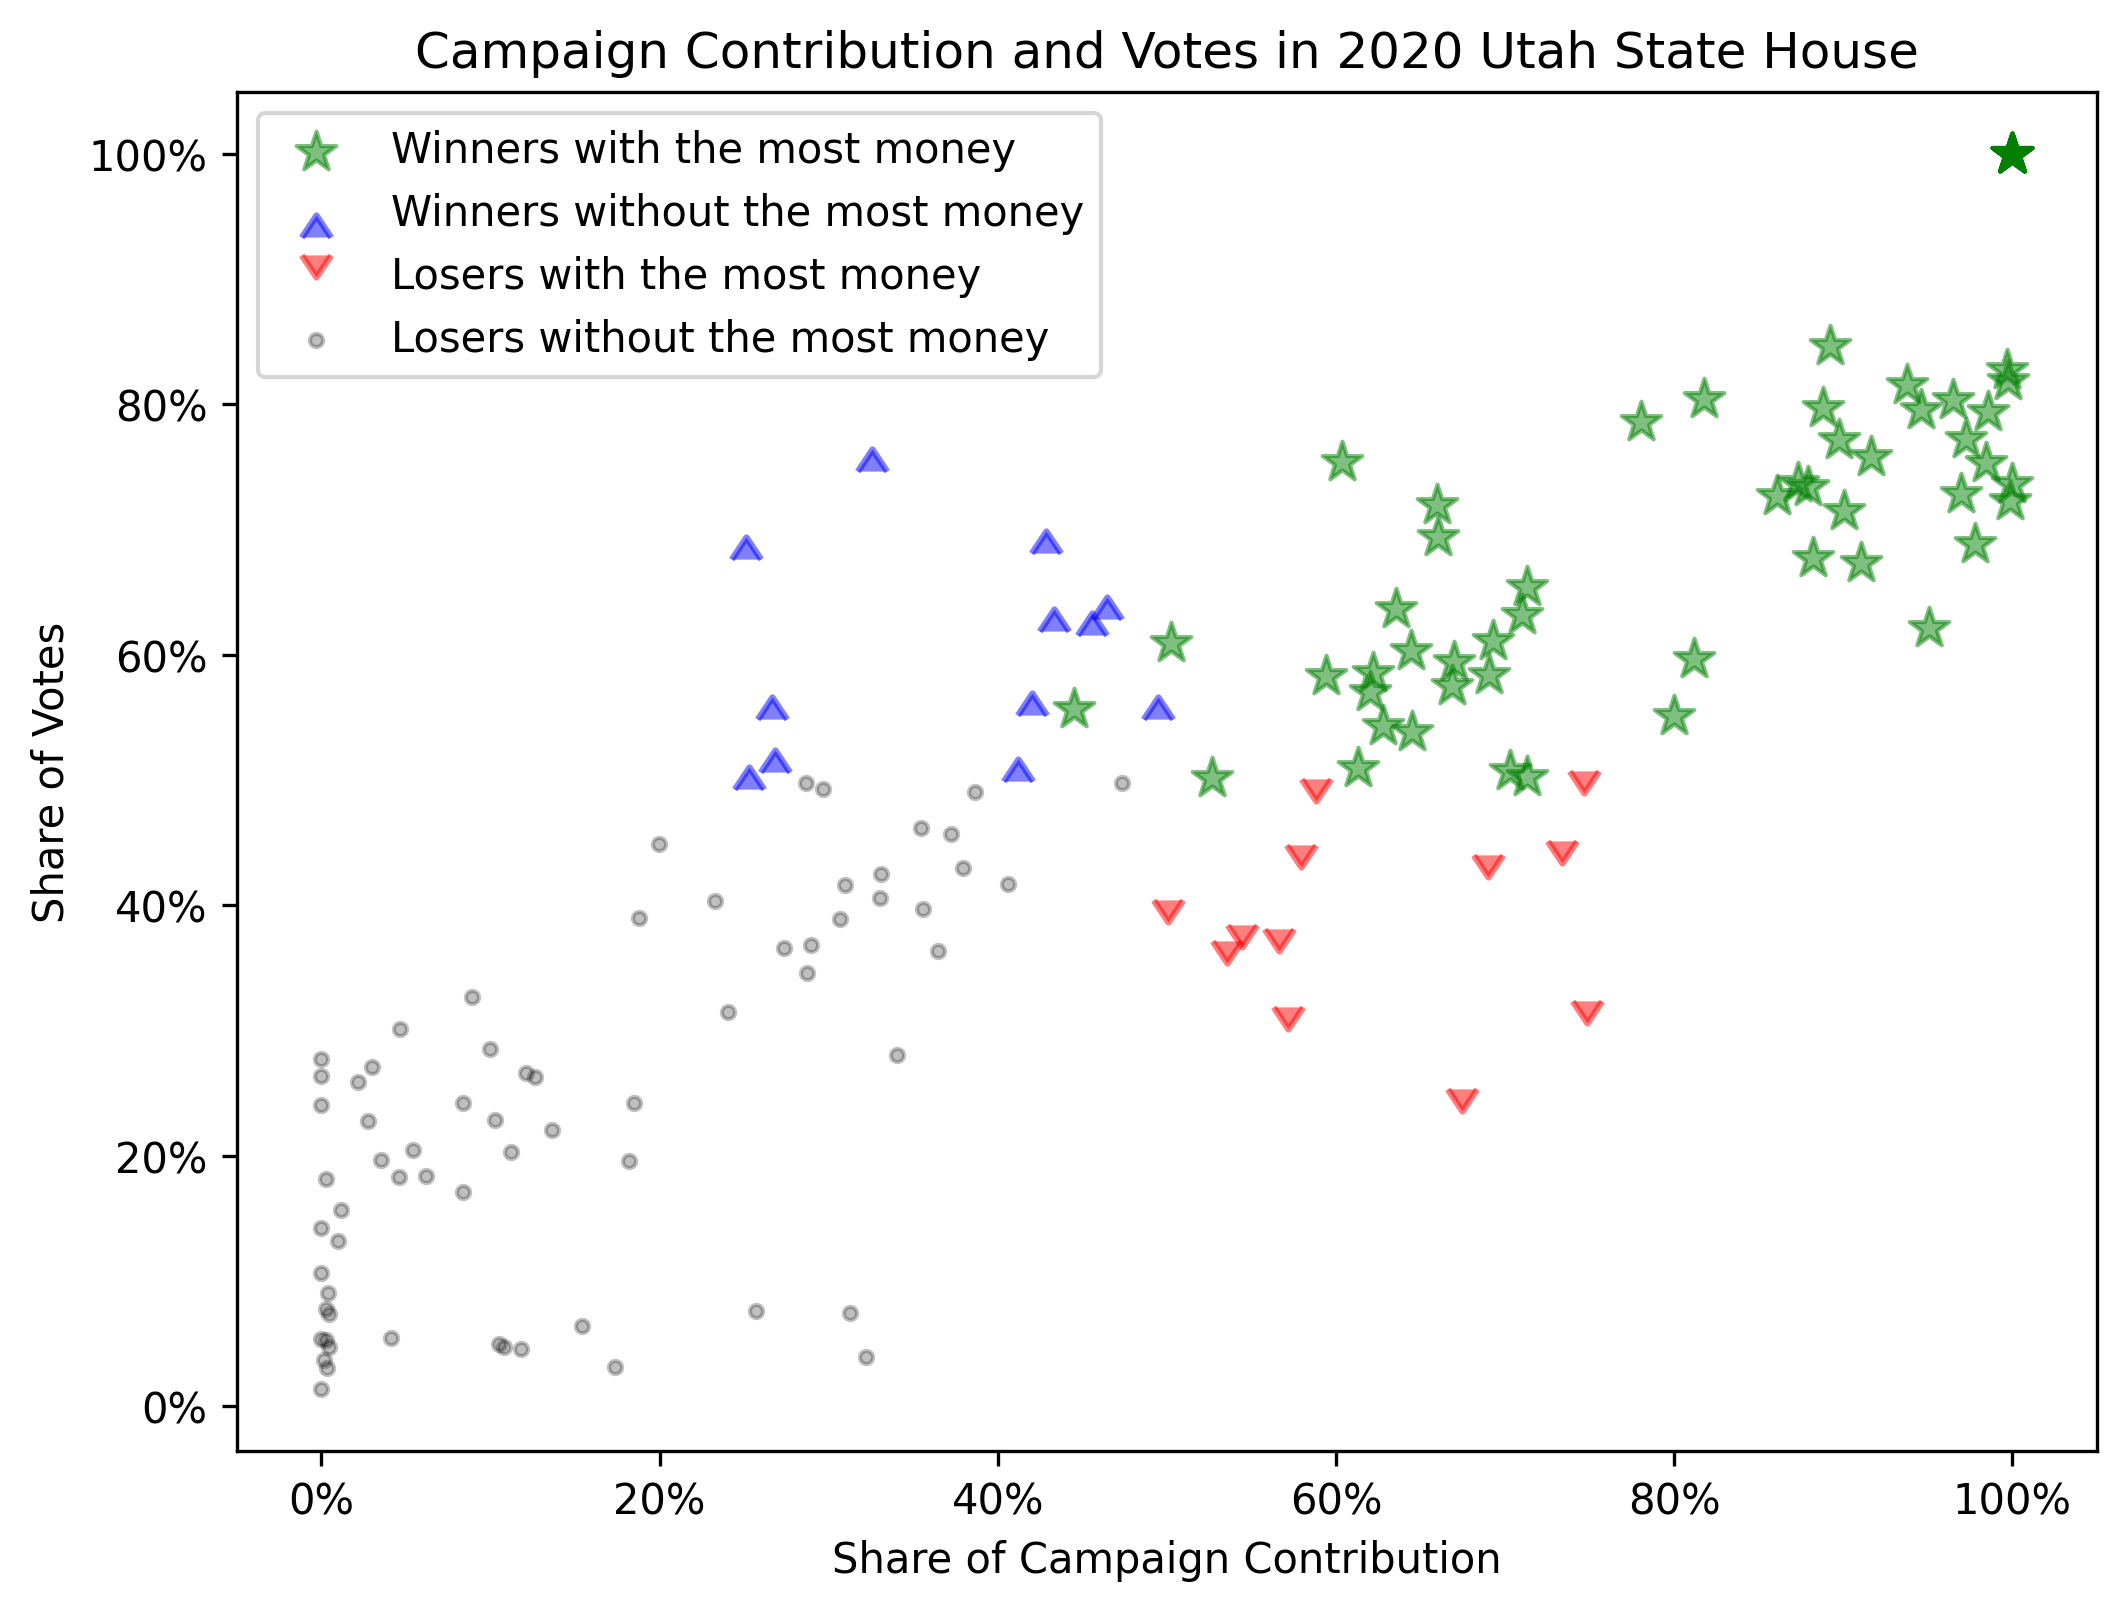

In [200]:
x_with_most_votes_and_contributions = []
y_with_most_votes_and_contributions = []
x_with_most_votes_but_not_contributions = []
y_with_most_votes_but_not_contributions = []
x_with_most_contributions_but_not_votes = []
y_with_most_contributions_but_not_votes = []
other_x = []
other_y = []

metric = 'Contribution'

number_won_with_most_money = 0
number_total_elections = 0
for district in election_df['district'].unique():
    district_election = election_df[election_df['district'] == district]
    
    total_expenditure = district_election[metric].sum()
    total_votes = district_election['votes'].sum()

    x = (district_election[metric] / total_expenditure).tolist()
    y = (district_election['votes'] / total_votes).tolist()

#     if (district_election[metric] == 0).any():
#         print(district_election)
#         continue

    index_most_votes = district_election['votes'].to_numpy().argmax()
    index_most_contributions = district_election[metric].to_numpy().argmax()

    if district_election[metric].argmax() == district_election['votes'].argmax():
        number_won_with_most_money += 1
        x_with_most_votes_and_contributions.append(district_election.iloc[index_most_votes][metric] / total_expenditure)
        y_with_most_votes_and_contributions.append(district_election.iloc[index_most_votes]['votes'] / total_votes)

        other_x += (district_election.loc[~district_election.index.isin([district_election.index[index_most_votes]])][metric] / total_expenditure).tolist()
        other_y += (district_election.loc[~district_election.index.isin([district_election.index[index_most_votes]])]['votes'] / total_votes).tolist()
    else:
        x_with_most_votes_but_not_contributions.append(district_election.iloc[index_most_votes][metric] / total_expenditure)
        y_with_most_votes_but_not_contributions.append(district_election.iloc[index_most_votes]['votes'] / total_votes)
        x_with_most_contributions_but_not_votes.append(district_election.iloc[index_most_contributions][metric] / total_expenditure)
        y_with_most_contributions_but_not_votes.append(district_election.iloc[index_most_contributions]['votes'] / total_votes)

        other_x += (district_election.loc[~district_election.index.isin([district_election.index[index_most_votes], district_election.index[index_most_contributions]])][metric] / total_expenditure).tolist()
        other_y += (district_election.loc[~district_election.index.isin([district_election.index[index_most_votes], district_election.index[index_most_contributions]])]['votes'] / total_votes).tolist()

    number_total_elections += 1

    winner = district_election.index.tolist()[district_election['votes'].argmax()]


print(f"Out of {number_total_elections} districts:")
print(f"\t{number_won_with_most_money} districts ({round(100 * number_won_with_most_money / number_total_elections, 2)}%) were won by the candidate with the most money in {metric}.")
print(len(x_with_most_votes_and_contributions))
print(len(x_with_most_votes_but_not_contributions))
print(len(x_with_most_contributions_but_not_votes))
print(len(other_x))

all_x = x_with_most_votes_and_contributions + x_with_most_votes_but_not_contributions + x_with_most_contributions_but_not_votes + other_x
all_y = y_with_most_votes_and_contributions + y_with_most_votes_but_not_contributions + y_with_most_contributions_but_not_votes + other_y

plt.figure(figsize=(8,6), dpi=300)

# m, b = np.polyfit(all_x, all_y, 1)
# x = np.arange(0, 1, 0.001)
# plt.plot(np.array(x), m*np.array(x) + b, color='grey')

plt.title(f"Campaign {metric} and Votes in 2020 Utah State House")
plt.scatter(x_with_most_votes_and_contributions, y_with_most_votes_and_contributions, color='green', alpha=0.5, s=100, marker='*', label='Winners with the most money')
plt.scatter(x_with_most_votes_but_not_contributions, y_with_most_votes_but_not_contributions, color='blue', alpha=0.5, s=50, marker=6, label='Winners without the most money')
plt.scatter(x_with_most_contributions_but_not_votes, y_with_most_contributions_but_not_votes, color='red', alpha=0.5, s=50, marker=7, label='Losers with the most money')
plt.scatter(other_x, other_y, color='black', alpha=0.25, s=10, label='Losers without the most money')
# plt.grid()
plt.legend()
plt.xlabel(f"Share of Campaign {metric}")
plt.ylabel("Share of Votes")
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

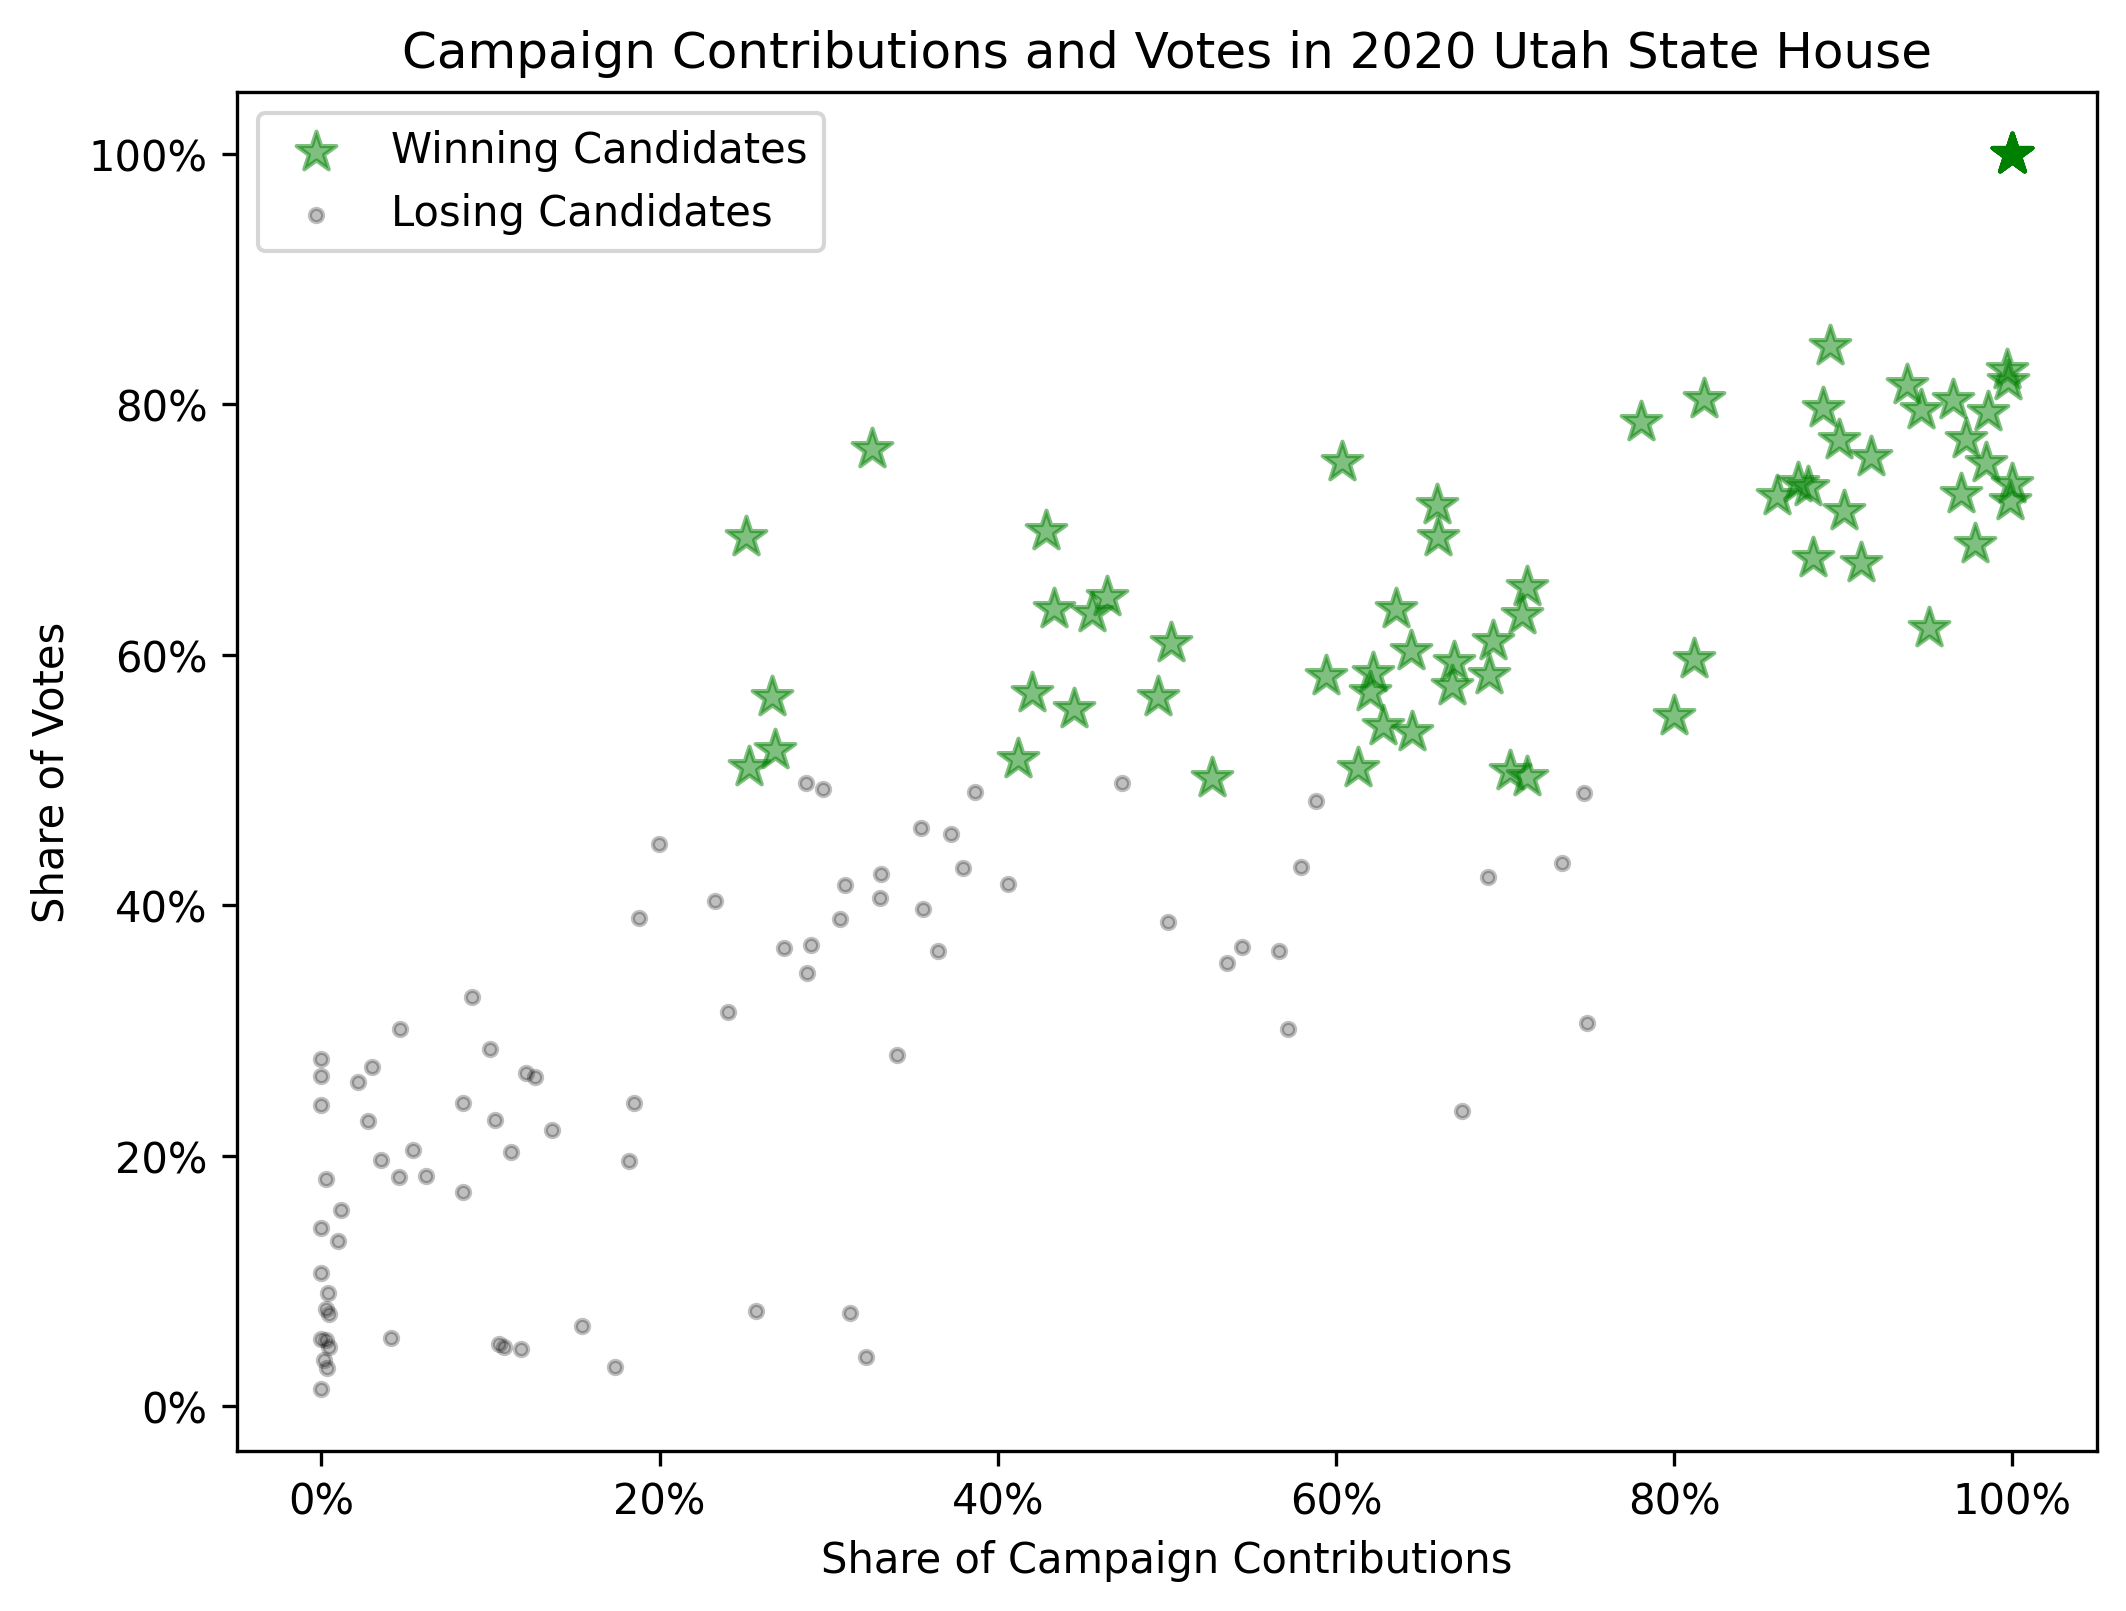

In [201]:
plt.figure(figsize=(8,6), dpi=300)
# plt.plot(np.array(x), m*np.array(x) + b, color='grey')

plt.title("Campaign Contributions and Votes in 2020 Utah State House")
plt.scatter(x_with_most_votes_and_contributions + x_with_most_votes_but_not_contributions, y_with_most_votes_and_contributions + y_with_most_votes_but_not_contributions, color='green', alpha=0.5, s=100, marker='*', label='Winning Candidates')
plt.scatter(x_with_most_contributions_but_not_votes + other_x, y_with_most_contributions_but_not_votes + other_y, color='black', alpha=0.25, s=10, label='Losing Candidates')
# plt.grid()
plt.legend()
plt.xlabel("Share of Campaign Contributions")
plt.ylabel("Share of Votes")
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

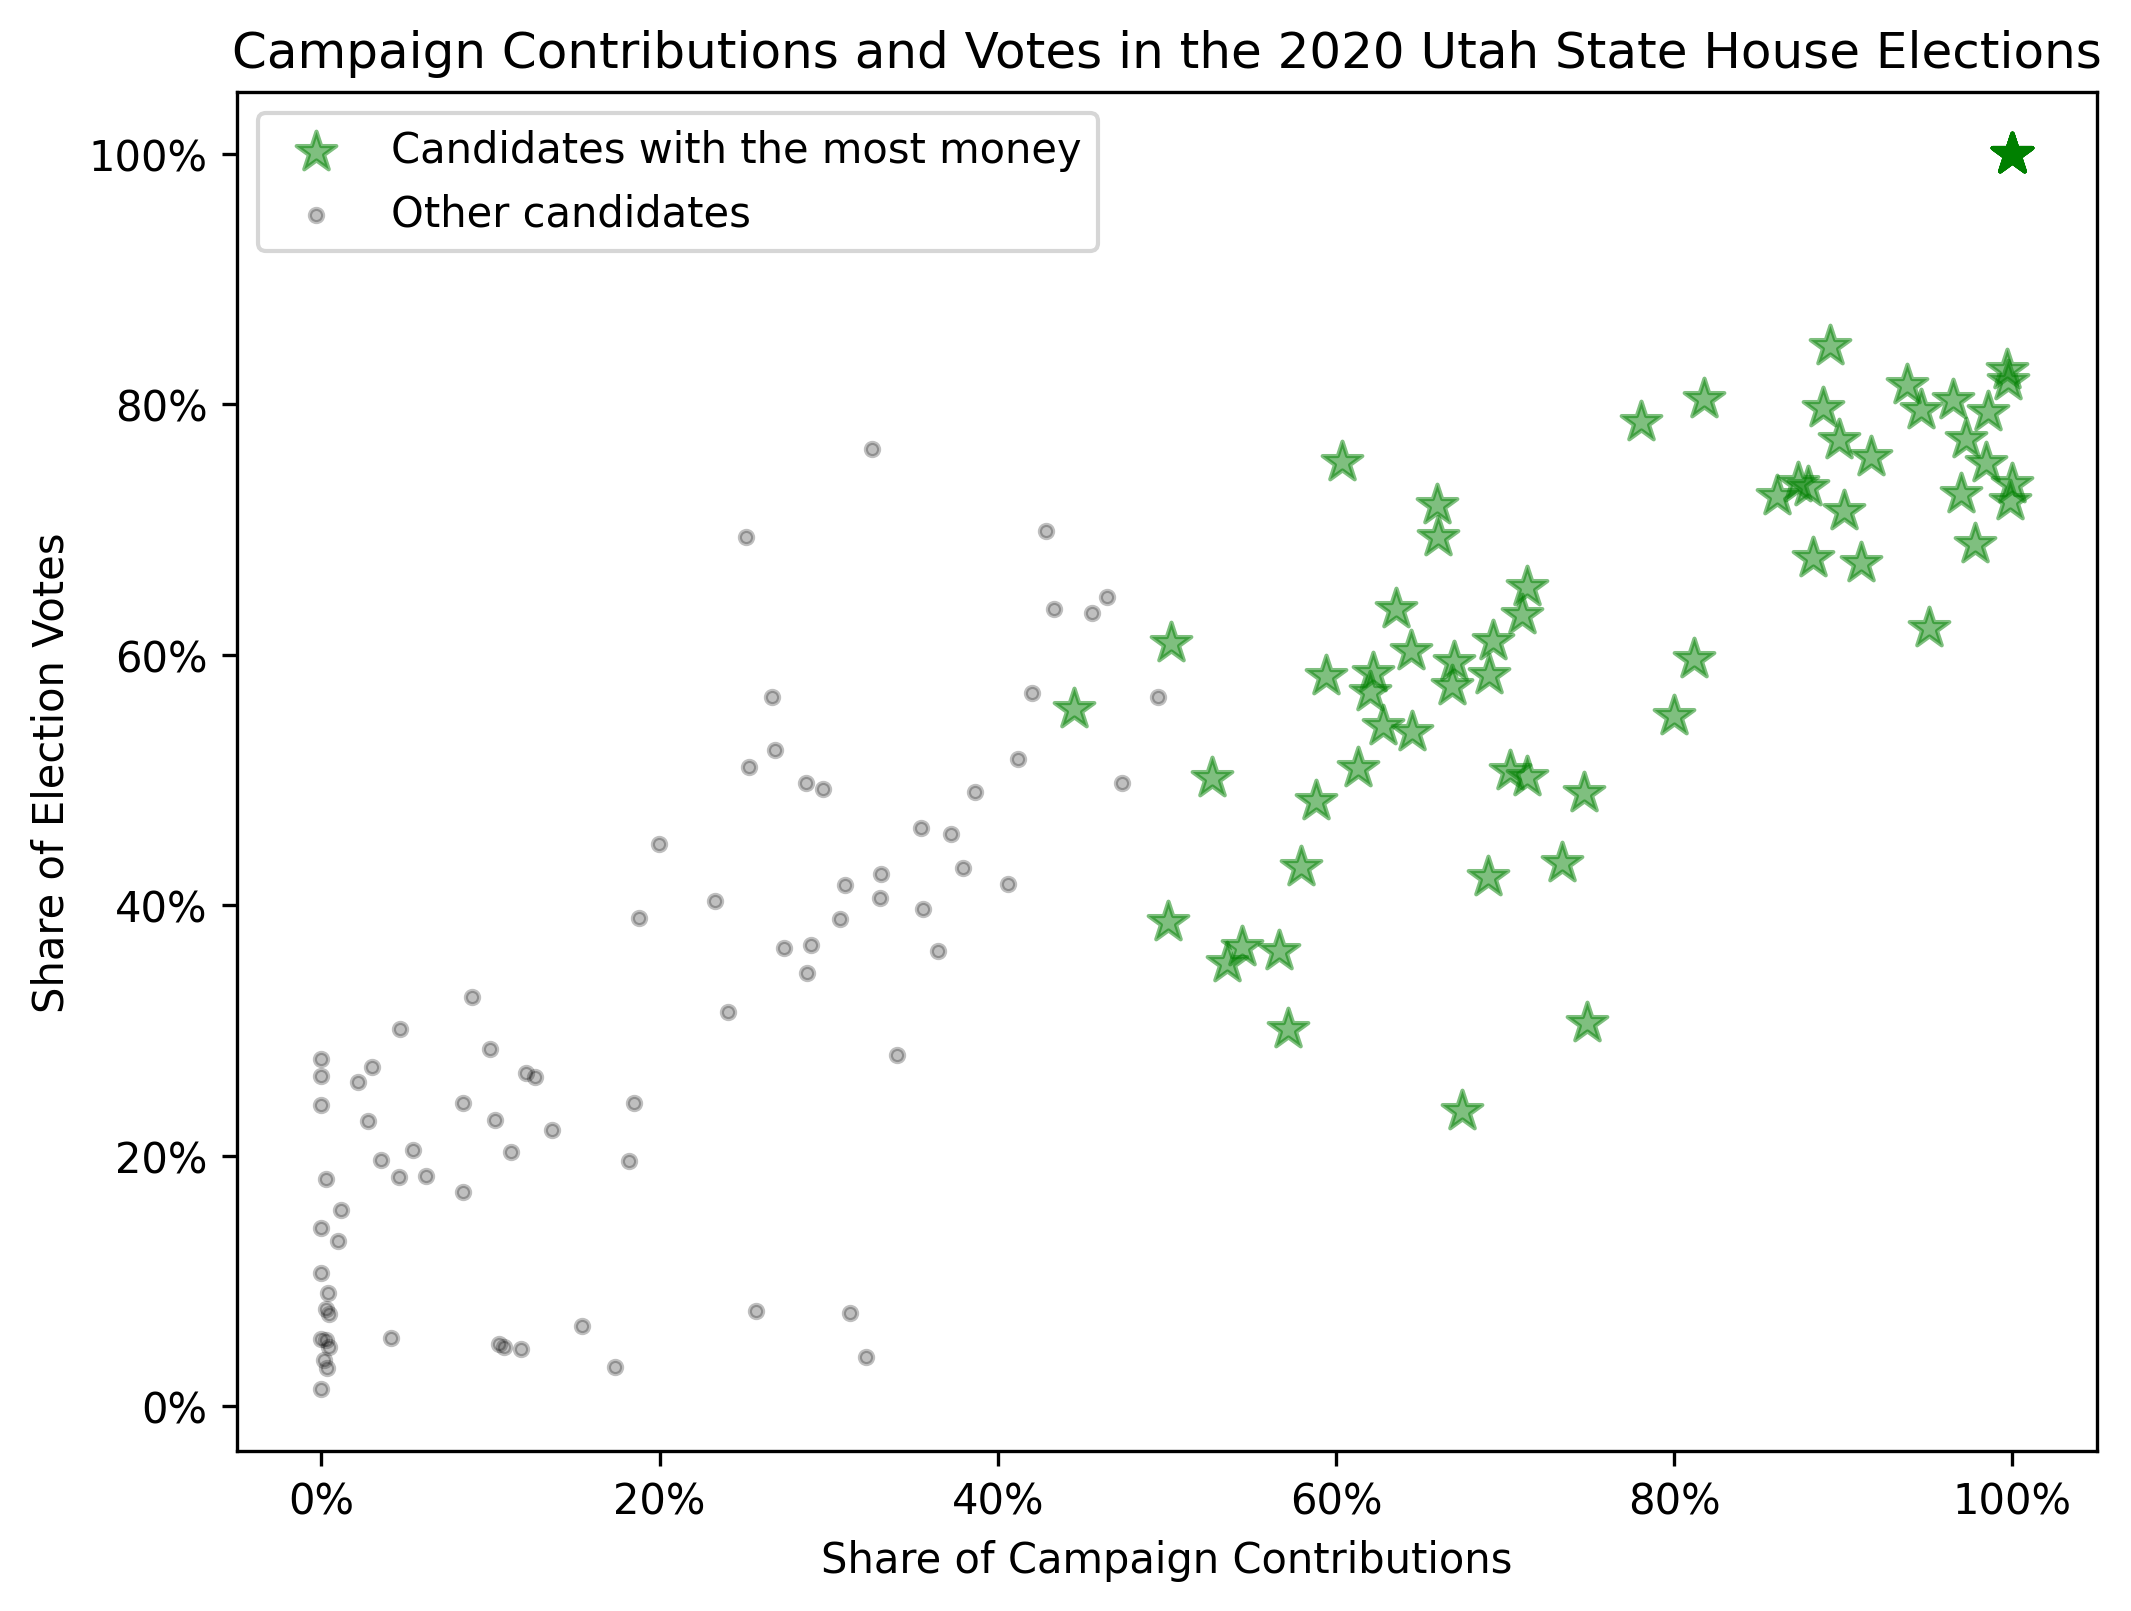

In [202]:
plt.figure(figsize=(8,6), dpi=300)
# plt.plot(np.array(x), m*np.array(x) + b, color='grey')

plt.title("Campaign Contributions and Votes in the 2020 Utah State House Elections")
plt.scatter(x_with_most_votes_and_contributions + x_with_most_contributions_but_not_votes, y_with_most_votes_and_contributions + y_with_most_contributions_but_not_votes, color='green', alpha=0.5, s=100, marker='*', label='Candidates with the most money')
plt.scatter(x_with_most_votes_but_not_contributions + other_x, y_with_most_votes_but_not_contributions + other_y, color='black', alpha=0.25, s=10, label='Other candidates')
# plt.grid()
plt.legend()
plt.xlabel("Share of Campaign Contributions")
plt.ylabel("Share of Election Votes")
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

In [17]:
np.corrcoef(all_x, all_y)

array([[1.        , 0.88372014],
       [0.88372014, 1.        ]])

In [67]:
election_df.mean()

votes            9022.545455
district           37.116883
Contribution    28042.652792
Expenditure     21168.359091
dtype: float64

In [68]:
election_df['Contribution'].max(), election_df[election_df['Contribution'] == election_df['Contribution'].max()]

(186489.72999999998,
                  votes  district party  Contribution  Expenditure
 Wilson, Brad R.  17965        15   REP     186489.73    145818.51)

<AxesSubplot:ylabel='Contribution'>

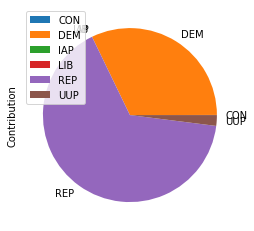

In [175]:
# election_df[['party', 'Contribution']].plot.pie(y='Contribution')
election_df.groupby(['party']).sum().plot.pie(y='Contribution')

<AxesSubplot:ylabel='votes'>

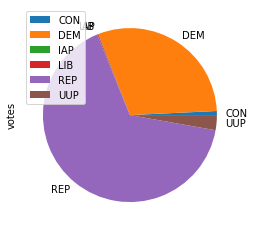

In [203]:
election_df.groupby(['party']).sum().plot.pie(y='votes')

<AxesSubplot:ylabel='winner'>

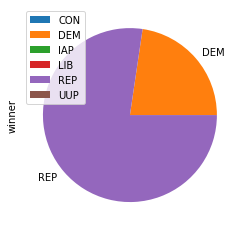

In [204]:
election_df.groupby(['party']).sum().plot.pie(y='winner')

In [210]:
election_df[['party', 'votes']].groupby(['party']).sum()

,votes
party,
CON,10403
DEM,418843
IAP,846
LIB,2395
REP,918220
UUP,38765


In [215]:
election_df[['party', 'votes']].groupby(['party']).sum() / election_df['votes'].sum()

,votes
party,
CON,0.007487
DEM,0.301440
IAP,0.000609
LIB,0.001724
REP,0.660841
UUP,0.027899


In [217]:
election_df['votes'].sum()

1389472

In [214]:
election_df.loc[election_df['votes'].idxmax()]

votes              27428
district               2
party                REP
Contribution    23052.97
Expenditure     18835.08
winner              True
Name: Moss, Jefferson, dtype: object

In [225]:
districts_with_dems_and_reps = []

for district in election_df['district'].unique():
    district_election = election_df[election_df['district'] == district]
    district_parties = district_election['party'].tolist()
    if 'REP' in district_parties and 'DEM' in district_parties:
        districts_with_dems_and_reps.append(district)
        
election_df[election_df.district.isin(districts_with_dems_and_reps)].groupby(['party'])['votes'].sum() / election_df[election_df.district.isin(districts_with_dems_and_reps)].groupby(['party'])['votes'].sum().sum()

party
CON    0.004865
DEM    0.401859
LIB    0.002468
REP    0.581621
UUP    0.009187
Name: votes, dtype: float64

In [66]:
district_totals = election_df.groupby('district').sum()

district_totals.mean()

votes           18526.293333
Contribution    57580.913733
Expenditure     43465.697333
dtype: float64

In [120]:
## donors = finance_df[(finance_df['TRAN_TYPE'] == "Contribution") & (~finance_df["NAME"].str.contains("Balance Transfer"))].groupby(['PCC', 'NAME']).agg({
donors = finance_df[(finance_df['PCC'].isin(election_df.index)) & (finance_df['TRAN_TYPE'] == "Contribution") & (~finance_df["NAME"].str.contains("Balance Transfer"))].groupby(['NAME']).agg({
    'TRAN_AMT': 'sum',
    'TRAN_ID': 'nunique'
})

donors.columns = ['Total Contribution Amount', 'Number of Contributions']

donors.head()

,Total Contribution Amount,Number of Contributions
NAME,,
Alex Cragan,10.0,1
Erica Wood,35.0,1
I.B.E.W. local Union 57 Cope Fund,500.0,1
Mark Petersen,20.0,1
Nicholas Brooks,10.0,1


In [121]:
donors.mean()

Total Contribution Amount    595.112862
Number of Contributions        1.749359
dtype: float64

In [122]:
donors.loc['Utah House Republican Election Committee PAC']

Total Contribution Amount    110054.7
Number of Contributions          37.0
Name: Utah House Republican Election Committee PAC, dtype: float64

In [123]:
donors.sum()

Total Contribution Amount    3711123.81
Number of Contributions        10909.00
dtype: float64

In [124]:
len(donors)

6236

In [125]:
len(donors[donors['Total Contribution Amount'] >= donors['Total Contribution Amount'].quantile(0.97)].index), donors['Total Contribution Amount'].quantile(0.97), donors[donors['Total Contribution Amount'] >= donors['Total Contribution Amount'].quantile(0.97)].sum() / donors.sum()

(188,
 3494.9099999999817,
 Total Contribution Amount    0.515572
 Number of Contributions      0.167751
 dtype: float64)

In [163]:
name = 'Regence'
print(finance_df[finance_df['NAME'] == name][['PCC', 'TRAN_AMT']])
election_df[election_df.index.isin(finance_df[finance_df['NAME'] == name]['PCC'])]

                      PCC  TRAN_AMT
1280      Barlow, Stewart     500.0
2683    Bramble, Curtis S    1000.0
2768       Brammer, Brady     500.0
10761     Cullimore, Kirk     500.0
12622       Dunnigan, Jim    2500.0
13444         Ferry, Joel    1000.0
14848         Hall, Craig     250.0
16011     Hawkes, Timothy    1000.0
16273     Hemmert, Daniel    3000.0
23648         Maloy, Cory     500.0
26080  Musselman, Calvin      500.0
30284   Pierucci, Darlene     500.0
32648       Schultz, Mike    2500.0
32858          Shipp, Rex     750.0
34835       Snider, Casey     500.0
35076   Spendlove, Robert     500.0
36628     Vickers, Evan J    2500.0
37272       Ward, Raymond     500.0
37583        Weiler, Todd     500.0
39347     Wilson, Brad R.    2500.0


,votes,district,party,Contribution,Expenditure
"Snider, Casey",15841,5,REP,11122.15,8706.45
"Maloy, Cory",19551,6,REP,21845.35,11942.61
"Musselman, Calvin",8426,9,REP,66913.37,11845.20
"Wilson, Brad R.",17965,15,REP,186489.73,145818.51
"Barlow, Stewart",13881,17,REP,72085.53,69436.32
"Hawkes, Timothy",17281,18,REP,58669.94,53413.93
"Ward, Raymond",15870,19,REP,26218.54,16773.74
"Brammer, Brady",20733,27,REP,22728.07,23411.21
"Hall, Craig",5398,33,REP,108502.77,112436.32
"Dunnigan, Jim",7836,39,REP,143530.45,201465.73


In [128]:
donors[donors['Total Contribution Amount'] >= donors['Total Contribution Amount'].quantile(0.97)].sort_values('Total Contribution Amount', ascending=False)

,Total Contribution Amount,Number of Contributions
NAME,,
Utah House Republican Election Committee PAC,110054.70,37
Utah Association of Realtors,89819.07,50
Wilson Leadership PAC,84686.44,42
Utah Women and Politics PAC,47500.00,16
Utah Women and Politics Political Action Committee,46000.00,9
Stratton Holdings,41200.00,5
David Hunt,37536.35,8
Reagan Outdoor Advertising,34661.00,35
Northern Utah Legislative PAC,33500.00,17
